In [1]:
%matplotlib inline


Compute the scattering transform of a speech recording
======================================================
This script loads a speech signal from the free spoken digit dataset (FSDD)
of a man pronouncing the word "zero," computes its scattering transform, and
displays the zeroth-, first-, and second-order scattering coefficients.



Preliminaries
 -------------

##############################################################################
 To handle audio file I/O, we import `os` and `scipy.io.wavfile`.



In [2]:
import numpy as np
import os
import scipy.io.wavfile

We import `matplotlib` to plot the calculated scattering coefficients.



In [3]:
import matplotlib.pyplot as plt

Finally, we import the `Scattering1D` class from the `scattering` package and
the `fetch_fsdd` function from `scattering.datasets`. The `Scattering1D`
class is what lets us calculate the scattering transform, while the
`fetch_fsdd` function downloads the FSDD, if needed.



In [4]:
from kymatio.numpy import Scattering1D
from kymatio.datasets import fetch_fsdd

Scattering setup
----------------
First, we download the FSDD (if not already downloaded) and read in the
recording `0_jackson_0.wav` of a man pronouncing the word "zero".



In [5]:
info_dataset = fetch_fsdd(verbose=True)

file_path = os.path.join(info_dataset['path_dataset'], sorted(info_dataset['files'])[0])
_, x = scipy.io.wavfile.read(file_path)

Cloning git repository at  https://github.com/Jakobovski/free-spoken-digit-dataset.git


Once the recording is in memory, we normalize it.



In [6]:
x = x / np.max(np.abs(x))

We are now ready to set up the parameters for the scattering transform.
First, the number of samples, `T`, is given by the size of our input `x`.
The averaging scale is specified as a power of two, `2**J`. Here, we set
`J = 6` to get an averaging, or maximum, scattering scale of `2**6 = 64`
samples. Finally, we set the number of wavelets per octave, `Q`, to `16`.
This lets us resolve frequencies at a resolution of `1/16` octaves.



In [8]:
x.shape

(5148,)

In [9]:
T = x.shape[-1]
J = 6
Q = 16

Finally, we are able to create the object which computes our scattering
transform, `scattering`.



In [10]:
scattering = Scattering1D(J, T, Q)

Compute and display the scattering coefficients
-----------------------------------------------
Computing the scattering transform of a signal is achieved using the
`__call__` method of the `Scattering1D` class. The output is an array of
shape `(C, T)`. Here, `C` is the number of scattering coefficient outputs,
and `T` is the number of samples along the time axis. This is typically much
smaller than the number of input samples since the scattering transform
performs an average in time and subsamples the result to save memory.



In [11]:
Sx = scattering(x)

To display the scattering coefficients, we must first identify which belong
to each order (zeroth, first, or second). We do this by extracting the `meta`
information from the scattering object and constructing masks for each order.



In [12]:
meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

First, we plot the original signal `x`.



Text(0.5, 1.0, 'Original signal')

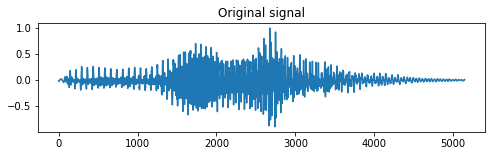

In [13]:
plt.figure(figsize=(8, 2))
plt.plot(x)
plt.title('Original signal')

We now plot the zeroth-order scattering coefficient, which is simply an
average of the original signal at the scale `2**J`.



Text(0.5, 1.0, 'Zeroth-order scattering')

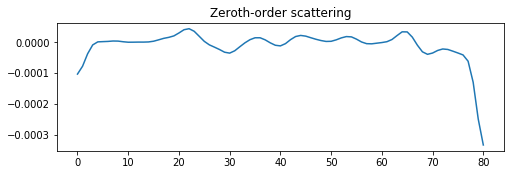

In [14]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')

We then plot the first-order coefficients, which are arranged along time
and log-frequency.



Text(0.5, 1.0, 'First-order scattering')

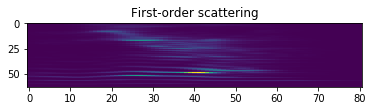

In [15]:
plt.subplot(3, 1, 2)
plt.imshow(Sx[order1], aspect='auto')
plt.title('First-order scattering')

Finally, we plot the second-order scattering coefficients. These are also
organized aling time, but has two log-frequency indices: one first-order
frequency and one second-order frequency. Here, both indices are mixed along
the vertical axis.



Text(0.5, 1.0, 'Second-order scattering')

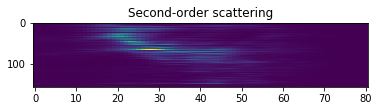

In [16]:
plt.subplot(3, 1, 3)
plt.imshow(Sx[order2], aspect='auto')
plt.title('Second-order scattering')

Display the plots!



In [17]:
plt.show()

In [23]:
500*44100 / 4000

5512.5

In [19]:
32768 / 8000

4.096

In [20]:
2400 * 4.096

9830.4

In [22]:
1/8000

0.000125